# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset():

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': df[col].max(), 'min': df[col].min()} for col in df.columns}

    # normal_df is the normalized dataframe
    normal_df = (df - df.min()) / (df.max() - df.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset()

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

print(normal_df.head())
# print()
# print(normalize_coeff)

   bias       age       bmi  children   charges
0     1  0.021739  0.321227       0.0  0.251611
1     1  0.000000  0.479150       0.2  0.009636
2     1  0.217391  0.458434       0.6  0.053115
3     1  0.326087  0.181464       0.0  0.333010
4     1  0.304348  0.347592       0.0  0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
from math import ceil
def shuffle(dataframe, ratio, target):
    columns = list(dataframe.columns)
    columns.remove(target)
    train_len = ceil(len(dataframe) * ratio)
    sf = dataframe.sample(frac = 1)
    X = sf[columns]
    Y = sf[target]
    X_train = X.iloc[:train_len].to_numpy().reshape((-1, len(columns)))
    X_test = X.iloc[train_len:].to_numpy().reshape((-1, len(columns)))
    Y_train = Y.iloc[:train_len].to_numpy().reshape((-1, 1))
    Y_test = Y.iloc[train_len:].to_numpy().reshape((-1, 1))
    return X_train, Y_train, X_test, Y_test

## Function to initialize weights

In [6]:
def initialize_weights(X):
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    return W

## Function to predict the results

In [7]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to denormalize a column

In [8]:
def denormalize(arr, name):
    c = np.array(arr).flatten()
    c = np.apply_along_axis(lambda x: x * (normalize_coeff[name]['max'] - normalize_coeff[name]['min']) + normalize_coeff[name]['min'], 0, c)
    return c

## Functions to calculate Error and Accuracy
### Metric used for error -> MSE
## $ MSE = \frac {\sum_{i=1}^{m}{(y_i - \hat y_i)^2}} {2m} $

In [9]:
def calculate_error(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / (2 * len(y))
    return mse

### Metric used for accuracy -> $ R^2 $
## $ R^2 = 1- \frac {2 \times MSE} {Var(X)} $

In [10]:
def calculate_accuracy(X, y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_x = np.var(X)
    rMSE = 2 * mse / var_x
    R2 = 1 - rMSE   
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### $ W = (X^TX)^{-1}X^TY $

In [11]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times with different train-test split

In [12]:
W_normal = {}
train_accuracy_normal = {}
test_accuracy_normal = {}
train_cost_normal = {}
test_cost_normal = {}

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_normal[i] = get_weight_by_equations(X_train, Y_train)
    train_predictions = predict(W_normal[i], X_train)
    test_predictions = predict(W_normal[i], X_test)
    train_accuracy_normal[i] = calculate_accuracy(X_train, Y_train, train_predictions)
    test_accuracy_normal[i] = calculate_accuracy(X_test, Y_test, test_predictions)
    train_cost_normal[i] = calculate_error(Y_train, train_predictions)
    test_cost_normal[i] = calculate_error(Y_test, test_predictions)

## Analyzing the models
### Analyzing costs

In [13]:
train_mean_cost_normal = np.mean(list(train_cost_normal.values()))
train_var_cost_normal = np.var(list(train_cost_normal.values()))
train_max_cost_normal = np.max(list(train_cost_normal.values()))
train_min_cost_normal = np.min(list(train_cost_normal.values()))

test_mean_cost_normal = np.mean(list(test_cost_normal.values()))
test_var_cost_normal = np.var(list(test_cost_normal.values()))
test_max_cost_normal = np.max(list(test_cost_normal.values()))
test_min_cost_normal = np.min(list(test_cost_normal.values()))

print(f'Mean train cost = {train_mean_cost_normal}')
print(f'Variance train cost = {train_var_cost_normal}')
print(f'Max train cost = {train_max_cost_normal}')
print(f'Min train cost = {train_min_cost_normal}')
print()
print(f'Mean test cost = {test_mean_cost_normal}')
print(f'Variance test cost = {test_var_cost_normal}')
print(f'Max test cost = {test_max_cost_normal}')
print(f'Min test cost = {test_min_cost_normal}')

Mean train cost = 0.016270768058632572
Variance train cost = 3.004409139308471e-07
Max train cost = 0.017348930125551693
Min train cost = 0.015378523219163288

Mean test cost = 0.01686542775252341
Variance test cost = 1.652580148322654e-06
Max test cost = 0.01895769850394689
Min test cost = 0.014306292638615114


### Analyzing accuracies

In [14]:
train_mean_accuracy_normal = np.mean(list(train_accuracy_normal.values()))
train_var_accuracy_normal = np.var(list(train_accuracy_normal.values()))
train_max_accuracy_normal = np.max(list(train_accuracy_normal.values()))
train_min_accuracy_normal = np.min(list(train_accuracy_normal.values()))

test_mean_accuracy_normal = np.mean(list(test_accuracy_normal.values()))
test_var_accuracy_normal = np.var(list(test_accuracy_normal.values()))
test_max_accuracy_normal = np.max(list(test_accuracy_normal.values()))
test_min_accuracy_normal = np.min(list(test_accuracy_normal.values()))

print(f'Mean train accuracy = {train_mean_accuracy_normal}')
print(f'Variance train accuracy = {train_var_accuracy_normal}')
print(f'Max train accuracy = {train_max_accuracy_normal}')
print(f'Min train accuracy = {train_min_accuracy_normal}')
print()
print(f'Mean test accuracy = {test_mean_accuracy_normal}')
print(f'Variance test accuracy = {test_var_accuracy_normal}')
print(f'Max test accuracy = {test_max_accuracy_normal}')
print(f'Min test accuracy = {test_min_accuracy_normal}')

Mean train accuracy = 0.7484440109512966
Variance train accuracy = 7.667509254425933e-05
Max train accuracy = 0.7624159032885021
Min train accuracy = 0.7311337761982308

Mean test accuracy = 0.7403079975550483
Variance test accuracy = 0.00041338611912389604
Max test accuracy = 0.7809330275584281
Min test accuracy = 0.707757266930739


## Visualizing the results
### Cost vs model number plot

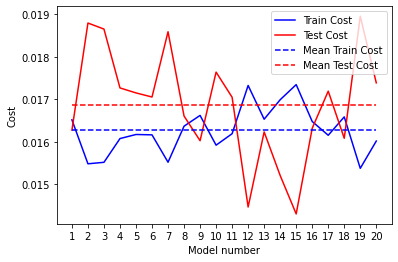

In [15]:
plt.figure()
plt.plot(list(train_cost_normal.keys()), list(train_cost_normal.values()), 'b-', label = 'Train Cost')
plt.plot(list(test_cost_normal.keys()), list(test_cost_normal.values()), 'r-', label = 'Test Cost')
plt.plot(list(train_cost_normal.keys()), [train_mean_cost_normal] * len(train_cost_normal), 'b--', label = 'Mean Train Cost')
plt.plot(list(test_cost_normal.keys()), [test_mean_cost_normal] * len(test_cost_normal), 'r--', label = 'Mean Test Cost')
plt.xlabel('Model number')
plt.ylabel('Cost')
plt.legend()
plt.xticks(list(train_cost_normal.keys()));

### Accuracy vs model number plot

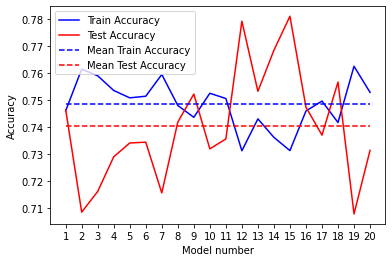

In [16]:
plt.figure()
plt.plot(list(train_accuracy_normal.keys()), list(train_accuracy_normal.values()), 'b-', label = 'Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), list(test_accuracy_normal.values()), 'r-', label = 'Test Accuracy')
plt.plot(list(train_accuracy_normal.keys()), [train_mean_accuracy_normal] * len(train_accuracy_normal), 'b--', label = 'Mean Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), [test_mean_accuracy_normal] * len(test_accuracy_normal), 'r--', label = 'Mean Test Accuracy')
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(train_accuracy_normal.keys()));

# Building Gradient Descent model
## Function for finding W using Gradient Descent

In [17]:
def gradient_descent(X, y, W, alpha = 0.1, epsilon = 1e-10, num_iterations = 1000):
    print_space = num_iterations // 10 if num_iterations > 10 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, num_iterations + 1):
        dW = (1 / m) * (X.T @ (X @ W - y))
        W = W - (alpha * dW)
        prediction = predict(W, X)
        cost = calculate_error(y, prediction)
        J[i] = cost
        acc = calculate_accuracy(X, y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} iterations is {cost}, accuracy = {acc}')
        if i != 1 and J[i-1] - J[i] < epsilon:
            break
    return W, J, accuracy

## Applying Gradient Descent
### 5 models are created with learning rates as 0.001, 0.005, 0.01, 0.05 and 0.1

In [18]:
W_gd = {}
train_cost_gd = {}
train_accuracy_gd = {}
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_init = initialize_weights(X_train)
    W_gd[alpha], train_cost_gd[alpha], train_accuracy_gd[alpha] = gradient_descent(X_train, Y_train, W_init, alpha = alpha, num_iterations = 300)
    print()

For alpha = 0.001
Cost after 1 iterations is 0.03607515414460621, accuracy = 0.4440137740509672
Cost after 30 iterations is 0.03452568222752639, accuracy = 0.46789406129625466
Cost after 60 iterations is 0.03305322747848463, accuracy = 0.49058736859353924
Cost after 90 iterations is 0.03170256150852722, accuracy = 0.5114036808993507
Cost after 120 iterations is 0.030463595863762575, accuracy = 0.5304984803325556
Cost after 150 iterations is 0.029327077831631212, accuracy = 0.5480143686604289
Cost after 180 iterations is 0.028284521206697933, accuracy = 0.5640821343284927
Cost after 210 iterations is 0.02732814279192258, accuracy = 0.5788217310958033
Cost after 240 iterations is 0.02645080416027267, accuracy = 0.592343175598439
Cost after 270 iterations is 0.02564595824090223, accuracy = 0.6047473705573165
Cost after 300 iterations is 0.02490760033022168, accuracy = 0.6161268597900817

For alpha = 0.005
Cost after 1 iterations is 0.036474271760203264, accuracy = 0.4391736277080599
Cost 

## Analyzing the models using random test sets

In [19]:
test_cost_gd = {}
test_accuracy_gd = {}

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    predictions = predict(W_gd[alpha], X_test)
    test_cost_gd[alpha] = calculate_error(Y_test, predictions)
    test_accuracy_gd[alpha] = calculate_accuracy(X_test, Y_test, predictions)
    print(f'Min cost = {test_accuracy_gd[alpha]}')
    print(f'Max accuracy = {test_accuracy_gd[alpha]}')
    print()

For alpha = 0.001
Min cost = 0.5505481024427064
Max accuracy = 0.5505481024427064

For alpha = 0.005
Min cost = 0.6956715681685364
Max accuracy = 0.6956715681685364

For alpha = 0.01
Min cost = 0.7768215995354018
Max accuracy = 0.7768215995354018

For alpha = 0.05
Min cost = 0.7356257170658951
Max accuracy = 0.7356257170658951

For alpha = 0.1
Min cost = 0.7469182271001045
Max accuracy = 0.7469182271001045



## Visualizing the results
### Cost vs iterations plot

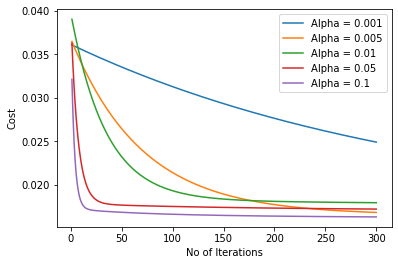

In [20]:
plt.figure()
for alpha, error in train_cost_gd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs iterations plot

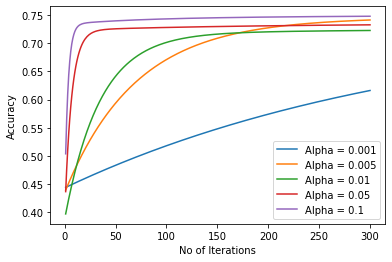

In [21]:
plt.figure()
for alpha, accuracy in train_accuracy_gd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend();

# Building Stochastic Gradient Descent model
## Function for finding W using Stochastic Gradient Descent

In [22]:
def stochastic_gradient_descent(X, Y, W, alpha = 0.1, epochs = 1000):
    print_space = epochs // 10 if epochs > 10 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, epochs + 1):
        for j in range(m):
            x = np.array(X[j]).reshape((1, len(W)))
            y = np.array(Y[j]).reshape((1, 1))
            dW = (1 / m) * x.T @ (x @ W - y)
            W = W - (alpha * dW)
        prediction = predict(W, X)
        cost = calculate_error(Y, prediction)
        J[i] = cost
        acc = calculate_accuracy(X, Y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} epochs is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Applying Stochastic Gradient Descent
### 5 models are created with learning rates as 0.001, 0.005, 0.01, 0.05 and 0.1

In [23]:
W_sgd = {}
train_cost_sgd = {}
train_accuracy_sgd = {}
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_init = initialize_weights(X_train)
    W_sgd[alpha], train_cost_sgd[alpha], train_accuracy_sgd[alpha] = stochastic_gradient_descent(X_train, Y_train, W_init, alpha = alpha, epochs = 300)
    print()

For alpha = 0.001
Cost after 1 epochs is 0.03784124389516456, accuracy = 0.4105857429723946
Cost after 30 epochs is 0.036192945438320405, accuracy = 0.4362595980124687
Cost after 60 epochs is 0.03462758457592627, accuracy = 0.46064161918080637
Cost after 90 epochs is 0.0331926311646426, accuracy = 0.48299241719167907
Cost after 120 epochs is 0.0318771990149783, accuracy = 0.5034815550570356
Cost after 150 epochs is 0.03067131078550177, accuracy = 0.522264439594456
Cost after 180 epochs is 0.02956582210600632, accuracy = 0.5394835032828065
Cost after 210 epochs is 0.02855235203539529, accuracy = 0.5552692874484598
Cost after 240 epochs is 0.02762321932542209, accuracy = 0.5697414350196679
Cost after 270 epochs is 0.02677138400557141, accuracy = 0.583009600398973
Cost after 300 epochs is 0.02599039384483647, accuracy = 0.5951742833732099

For alpha = 0.005
Cost after 1 epochs is 0.035546400267686386, accuracy = 0.4497229937645656
Cost after 30 epochs is 0.0289698441971488, accuracy = 0.5

## Analyzing the models using random test sets

In [24]:
test_cost_sgd = {}
test_accuracy_sgd = {}

for alpha in alphas:
    print(f'For alpha = {alpha}')
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    predictions = predict(W_sgd[alpha], X_test)
    test_cost_sgd[alpha] = calculate_error(Y_test, predictions)
    test_accuracy_sgd[alpha] = calculate_accuracy(X_test, Y_test, predictions)
    print(f'Min cost = {test_cost_sgd[alpha]}')
    print(f'Max accuracy = {test_accuracy_sgd[alpha]}')
    print()

For alpha = 0.001
Min cost = 0.021562721758195277
Max accuracy = 0.6778044832143222

For alpha = 0.005
Min cost = 0.018814437442130537
Max accuracy = 0.7019803995750523

For alpha = 0.01
Min cost = 0.021179234310822085
Max accuracy = 0.666634357872918

For alpha = 0.05
Min cost = 0.015918225207874996
Max accuracy = 0.7580113928408683

For alpha = 0.1
Min cost = 0.017505206231447926
Max accuracy = 0.7236617511892194



## Visualizing the results
### Cost vs epochs plot

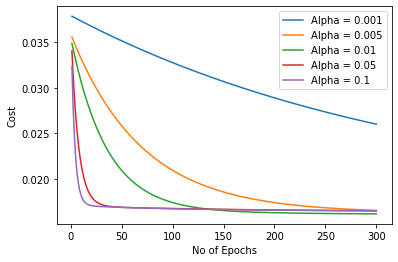

In [25]:
plt.figure()
for alpha, error in train_cost_sgd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'Alpha = {alpha}')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs epochs plot

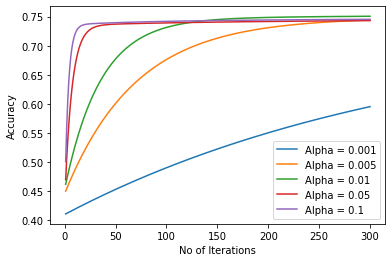

In [26]:
plt.figure()
for alpha, accuracy in train_accuracy_sgd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'Alpha = {alpha}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend();